In [8]:
import json
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import re
import spacy
from nltk.corpus import sentiwordnet as swn
from IPython.display import clear_output
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
plotly.offline.init_notebook_mode (connected = True)

In [4]:
pip install plotly

     |████████████████████████████████| 25.3 MB 7.2 MB/s eta 0:00:01     |█████████████████▉              | 14.1 MB 7.3 MB/s eta 0:00:02
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install spacy

     |████████████████████████████████| 6.3 MB 2.4 MB/s eta 0:00:01     |████████████████████████████▊   | 5.7 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 11.8 MB/s eta 0:00:01     |██████▋                         | 1.2 MB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.7 MB 19.0 MB/s eta 0:00:01
     |████████████████████████████████| 106 kB 19.6 MB/s eta 0:00:01
     |████████████████████████████████| 615 kB 10.9 MB/s eta 0:00:01
     |████████████████████████████████| 181 kB 18.8 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.8 MB/s eta 0:00:011
     |████████████████████████████████| 452 kB 16.7 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 9.3 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
data = json.load(open('B000O161V2.json'))
df = pd.DataFrame(data["Reviews"])
display(df)

,Title,Author,ReviewID,Overall,Content,Date
0,"Unless you are a sport journalist, I don't thi...",Sidarta Tanu,RN33NJN2WLJYT,5.0,The 10 Megapixel Nikon D40x is targeted for th...,"May 2, 2007"
1,"Not for Soccer Moms, Sports Shooting, Others w...",Baltimore Jack,R32YEY9J8MXXNO,4.0,The D40x is a hard camera to rate because for ...,"June 27, 2007"
2,"Great camera, tought lens decisions",Joseph Adler,R1BTP06O9RVZ86,5.0,"As I am writing this, there are 43 reviews of ...","October 8, 2007"
3,"Solid performer, just a few catches.","Hiram Grant ""just call me Sam""",RAIIW0VXIRBW3,4.0,The D40x is a 10 megapixel upgrade to their po...,"April 22, 2007"
4,Great Camera,"James D. Lindsay ""jlindsay""",ROS8Q6YJ58IQV,5.0,I have been into photography about forty years...,"June 11, 2007"
...,...,...,...,...,...,...
159,Super Saver,"C. Hample ""Chrouglas""",R28Y68TGQGJ0VJ,5.0,I was never very good at math so I am not surp...,"October 19, 2007"
160,Perfect,Massimo Osti,R1SHOQXMM9W0O0,5.0,Delivery was a little troublesome. UPS deliver...,"October 13, 2007"
161,"Nikon, as usual, yes. Amazon prices, NO.","Keramat Poorsoltan ""Teacher""",R23Z6X2NEVOAF,3.0,I am quite pleased with the camera. After all ...,"November 13, 2007"
162,Lightest D-SLR Nikon D40X with 18-55 lens,Hakan Yalcin,R21FBW9452PPW4,3.0,I am an owner of Nikon D80 and bought D40x to ...,"July 12, 2007"


In [10]:
df.replace({"positive":1,"negative":0},inplace=True)
Contents = df['Content'].copy()
df['Removing_stopwords'] = Contents
display(df)

,Title,Author,ReviewID,Overall,Content,Date,Removing_stopwords
0,"Unless you are a sport journalist, I don't thi...",Sidarta Tanu,RN33NJN2WLJYT,5.0,The 10 Megapixel Nikon D40x is targeted for th...,"May 2, 2007",The 10 Megapixel Nikon D40x is targeted for th...
1,"Not for Soccer Moms, Sports Shooting, Others w...",Baltimore Jack,R32YEY9J8MXXNO,4.0,The D40x is a hard camera to rate because for ...,"June 27, 2007",The D40x is a hard camera to rate because for ...
2,"Great camera, tought lens decisions",Joseph Adler,R1BTP06O9RVZ86,5.0,"As I am writing this, there are 43 reviews of ...","October 8, 2007","As I am writing this, there are 43 reviews of ..."
3,"Solid performer, just a few catches.","Hiram Grant ""just call me Sam""",RAIIW0VXIRBW3,4.0,The D40x is a 10 megapixel upgrade to their po...,"April 22, 2007",The D40x is a 10 megapixel upgrade to their po...
4,Great Camera,"James D. Lindsay ""jlindsay""",ROS8Q6YJ58IQV,5.0,I have been into photography about forty years...,"June 11, 2007",I have been into photography about forty years...
...,...,...,...,...,...,...,...
159,Super Saver,"C. Hample ""Chrouglas""",R28Y68TGQGJ0VJ,5.0,I was never very good at math so I am not surp...,"October 19, 2007",I was never very good at math so I am not surp...
160,Perfect,Massimo Osti,R1SHOQXMM9W0O0,5.0,Delivery was a little troublesome. UPS deliver...,"October 13, 2007",Delivery was a little troublesome. UPS deliver...
161,"Nikon, as usual, yes. Amazon prices, NO.","Keramat Poorsoltan ""Teacher""",R23Z6X2NEVOAF,3.0,I am quite pleased with the camera. After all ...,"November 13, 2007",I am quite pleased with the camera. After all ...
162,Lightest D-SLR Nikon D40X with 18-55 lens,Hakan Yalcin,R21FBW9452PPW4,3.0,I am an owner of Nikon D80 and bought D40x to ...,"July 12, 2007",I am an owner of Nikon D80 and bought D40x to ...


In [11]:

def preprocess_data(data,name):
    data[name]=data[name].str.lower()
    data[name]=data[name].apply(lambda x:re.sub(r'\B#\S+','',x))
    data[name]=data[name].apply(lambda x:re.sub(r"http\S+", "", x))
    data[name]=data[name].apply(lambda x:' '.join(re.findall(r'\w+', x)))
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
    data[name]=data[name].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
    data[name]=data[name].apply(lambda x:re.sub('@[^\s]+','',x))


In [12]:
def remove_stopwords(data,name):
      
    def getting(sent):
        temp_sent = sent
        
        filtered_sentence = [] 

        stop_words = set(stopwords.words('english')) 

        word_tokens = word_tokenize(temp_sent) 
        
        filtered_sentence = [w for w in word_tokens if not w in stop_words] 
        
        return filtered_sentence
    x=[]
    for i in data[name].values:
        x.append(getting(i))
    data[name]=x

In [24]:
lemma = WordNetLemmatizer()

def Lemma(data,name):
    def getting2(sent):
        
        temp = sent
        output_sentence =[]
        word_tokens = word_tokenize(temp)
        lemma_output = [lemma.lemmatize(w) for w in word_tokens]

        without_single_chr = [word for word in lemma_output if len(word) > 2]

        cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]
        
        return cleaned_data_title

    x=[]
    for i in data[name].values:
        x.append(getting2(i))
    data[name]=x

In [14]:
def sentence_preparation(data,name):
    data[name]=data[name].apply(lambda x:' '.join([i+' ' for i in x]))
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/libpatron/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/libpatron/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/libpatron/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [27]:
preprocess_data(df,'Removing_stopwords')
remove_stopwords(df,'Removing_stopwords')
sentence_preparation(df,'Removing_stopwords')
final_Edit = df['Removing_stopwords'].copy()
df["lemmatization"] = final_Edit
Lemma(df,'lemmatization')
sentence_preparation(df,'lemmatization')

In [28]:
display(df)

,Title,Author,ReviewID,Overall,Content,Date,Removing_stopwords,lemmatization
0,"Unless you are a sport journalist, I don't thi...",Sidarta Tanu,RN33NJN2WLJYT,5.0,The 10 Megapixel Nikon D40x is targeted for th...,"May 2, 2007",10 megapixel nikon d40x targeted wantrelativel...,megapixel nikon d40x targeted wantrelatively c...
1,"Not for Soccer Moms, Sports Shooting, Others w...",Baltimore Jack,R32YEY9J8MXXNO,4.0,The D40x is a hard camera to rate because for ...,"June 27, 2007",d40x ishard camera rate be5 star camera others...,d40x ishard camera rate be5 star camera others...
2,"Great camera, tought lens decisions",Joseph Adler,R1BTP06O9RVZ86,5.0,"As I am writing this, there are 43 reviews of ...","October 8, 2007",asam writing 43 reviews d40x cover every featu...,asam writing review d40x cover every feature c...
3,"Solid performer, just a few catches.","Hiram Grant ""just call me Sam""",RAIIW0VXIRBW3,4.0,The D40x is a 10 megapixel upgrade to their po...,"April 22, 2007",d40x is10 megapixel upgrade popular d40 camera...,d40x is10 megapixel upgrade popular d40 camera...
4,Great Camera,"James D. Lindsay ""jlindsay""",ROS8Q6YJ58IQV,5.0,I have been into photography about forty years...,"June 11, 2007",photography forty yearsdecided move todigital ...,photography forty yearsdecided move todigital ...
...,...,...,...,...,...,...,...,...
159,Super Saver,"C. Hample ""Chrouglas""",R28Y68TGQGJ0VJ,5.0,I was never very good at math so I am not surp...,"October 19, 2007",never good math soam surprised thatfeel need w...,never good math soam surprised thatfeel need w...
160,Perfect,Massimo Osti,R1SHOQXMM9W0O0,5.0,Delivery was a little troublesome. UPS deliver...,"October 13, 2007",delivery waslittle troublesome ups deliver day...,delivery waslittle troublesome ups deliver day...
161,"Nikon, as usual, yes. Amazon prices, NO.","Keramat Poorsoltan ""Teacher""",R23Z6X2NEVOAF,3.0,I am quite pleased with the camera. After all ...,"November 13, 2007",quite pleased camera nikonhave various nikons ...,quite pleased camera nikonhave various nikons ...
162,Lightest D-SLR Nikon D40X with 18-55 lens,Hakan Yalcin,R21FBW9452PPW4,3.0,I am an owner of Nikon D80 and bought D40x to ...,"July 12, 2007",owner nikon d80 bought d40x girlfriend d40x ha...,owner nikon d80 bought d40x girlfriend d40x ha...


In [30]:
import nltk
import ssl
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [33]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/libpatron/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [39]:
import nltk
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/libpatron/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

In [50]:
posi=negi=obj=count=0
postags = []

for review in df['lemmatization']:
    list = word_tokenize(review)
    postags.append(nltk.pos_tag(list))

df['pos_tags'] = postags

def pos(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

def get_sentiment(word,tag):
    wn_tag = pos(tag)
    
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []
    
    lemma1 = lemma.lemmatize(word, pos=wn_tag)
    if not lemma1:
        return []
    
    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []
    
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

    posi=negi=obj=count=0
    
    
senti_score = []
    
    
for pos_val in df['pos_tags']:
    senti_val = [get_sentiment(x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            posi = posi + score[1]  #positive score is stored at 2nd position
            negi = negi + score[2]  #negative score is stored at 3rd position
        except:
            continue
    senti_score.append(posi - negi)
    posi=negi=0    
    
df['senti_score'] = senti_score
print(df['senti_score'])

print(df.head)

    

0      12.250
1      12.875
2       9.625
3       1.750
4       5.125
        ...  
159     1.375
160    -1.125
161     0.375
162     0.000
163     0.875
Name: senti_score, Length: 164, dtype: float64
<bound method NDFrame.head of                                                  Title  \
0    Unless you are a sport journalist, I don't thi...   
1    Not for Soccer Moms, Sports Shooting, Others w...   
2                  Great camera, tought lens decisions   
3                 Solid performer, just a few catches.   
4                                         Great Camera   
..                                                 ...   
159                                        Super Saver   
160                                            Perfect   
161           Nikon, as usual, yes. Amazon prices, NO.   
162          Lightest D-SLR Nikon D40X with 18-55 lens   
163  If you have epilepsy, this is not the camera f...   

                             Author        ReviewID Overall  \
0        

In [52]:
data=[]
for i in range(len(df)):
    if df['senti_score'][i]>= 0.05:
        data.append('Positive')
    elif df['senti_score'][i]<= -0.05:
        data.append('Negative')
    else:
        data.append('Neutral')
df['Final Sentiment']=data

TypeError: list indices must be integers or slices, not str

In [47]:
display(df)

,Title,Author,ReviewID,Overall,Content,Date,Removing_stopwords,lemmatization,pos_tags,senti_score,Final Sentiment
0,"Unless you are a sport journalist, I don't thi...",Sidarta Tanu,RN33NJN2WLJYT,5.0,The 10 Megapixel Nikon D40x is targeted for th...,"May 2, 2007",10 megapixel nikon d40x targeted wantrelativel...,megapixel nikon d40x targeted wantrelatively c...,"[(megapixel, NN), (nikon, CC), (d40x, NN), (ta...",12.250,Positive
1,"Not for Soccer Moms, Sports Shooting, Others w...",Baltimore Jack,R32YEY9J8MXXNO,4.0,The D40x is a hard camera to rate because for ...,"June 27, 2007",d40x ishard camera rate be5 star camera others...,d40x ishard camera rate be5 star camera others...,"[(d40x, RB), (ishard, JJ), (camera, NN), (rate...",12.875,Positive
2,"Great camera, tought lens decisions",Joseph Adler,R1BTP06O9RVZ86,5.0,"As I am writing this, there are 43 reviews of ...","October 8, 2007",asam writing 43 reviews d40x cover every featu...,asam writing review d40x cover every feature c...,"[(asam, NN), (writing, VBG), (review, NN), (d4...",9.625,Positive
3,"Solid performer, just a few catches.","Hiram Grant ""just call me Sam""",RAIIW0VXIRBW3,4.0,The D40x is a 10 megapixel upgrade to their po...,"April 22, 2007",d40x is10 megapixel upgrade popular d40 camera...,d40x is10 megapixel upgrade popular d40 camera...,"[(d40x, NN), (is10, NN), (megapixel, NN), (upg...",1.750,Positive
4,Great Camera,"James D. Lindsay ""jlindsay""",ROS8Q6YJ58IQV,5.0,I have been into photography about forty years...,"June 11, 2007",photography forty yearsdecided move todigital ...,photography forty yearsdecided move todigital ...,"[(photography, NN), (forty, NN), (yearsdecided...",5.125,Positive
...,...,...,...,...,...,...,...,...,...,...,...
159,Super Saver,"C. Hample ""Chrouglas""",R28Y68TGQGJ0VJ,5.0,I was never very good at math so I am not surp...,"October 19, 2007",never good math soam surprised thatfeel need w...,never good math soam surprised thatfeel need w...,"[(never, RB), (good, JJ), (math, NN), (soam, N...",1.375,Positive
160,Perfect,Massimo Osti,R1SHOQXMM9W0O0,5.0,Delivery was a little troublesome. UPS deliver...,"October 13, 2007",delivery waslittle troublesome ups deliver day...,delivery waslittle troublesome ups deliver day...,"[(delivery, NN), (waslittle, JJ), (troublesome...",-1.125,Negative
161,"Nikon, as usual, yes. Amazon prices, NO.","Keramat Poorsoltan ""Teacher""",R23Z6X2NEVOAF,3.0,I am quite pleased with the camera. After all ...,"November 13, 2007",quite pleased camera nikonhave various nikons ...,quite pleased camera nikonhave various nikons ...,"[(quite, RB), (pleased, JJ), (camera, NN), (ni...",0.375,Positive
162,Lightest D-SLR Nikon D40X with 18-55 lens,Hakan Yalcin,R21FBW9452PPW4,3.0,I am an owner of Nikon D80 and bought D40x to ...,"July 12, 2007",owner nikon d80 bought d40x girlfriend d40x ha...,owner nikon d80 bought d40x girlfriend d40x ha...,"[(owner, NN), (nikon, CC), (d80, NN), (bought,...",0.000,Neutral


/Users/libpatron/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Final Sentiment', ylabel='count'>

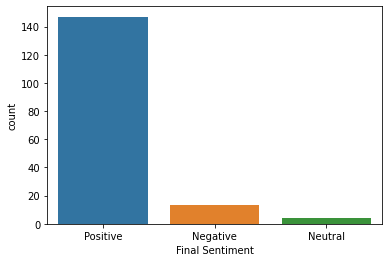

In [48]:
import seaborn as sns
sns.countplot(df['Final Sentiment'])